# Data Initialization

In [1]:
# import libraries for data management
import numpy as np 
import pandas as pd
from sklearn import preprocessing

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

<Figure size 1296x432 with 0 Axes>

In [2]:
#load dataset

data = pd.read_csv('ECommerce_Cleansed.csv',index_col = 'CustomerID')

In [3]:
data.head()

,Churn,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,Tenure_zscore,HourSpendOnApp_zscore,...,Debit Card,E wallet,Male,Fashion,Grocery,Laptop & Accessory,Mobile,Mobile Phone.1,Divorced,Married
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1,3,3,2,9,1,1.0,1.0,-0.74081,0.108090,...,1,0,0,0,0,1,0,0,0,0
50002,1,1,4,3,7,1,0.0,1.0,-0.03925,0.108090,...,0,0,1,0,0,0,1,0,0,0
50003,1,1,4,3,6,1,0.0,1.0,-0.03925,-1.307210,...,1,0,1,0,0,0,1,0,0,0
50004,1,3,4,5,8,0,0.0,1.0,-1.21963,-1.307210,...,1,0,1,0,0,1,0,0,0,0
50005,1,1,3,5,3,0,1.0,1.0,-1.21963,-0.325522,...,0,0,1,0,0,0,1,0,0,0


# Machine Learning (Logistic Regression)

In [4]:
# import libraries for machine learning (logistic regression)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

In [5]:
# X and Y split

X = data.drop(['Churn'],axis='columns',inplace=False)
Y = data['Churn']

In [6]:
# Test and Train Set Split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
# change target column to array

train_yact = train_y.values.ravel()
test_yact = test_y.values.ravel()

### baseline

In [8]:
# define model to be logistic regression

lr = LogisticRegression()

In [9]:
# train model using training dataset

lr.fit(train_x,train_yact)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [10]:
# Default Model (Baseline)

pred_y = lr.predict(test_x)
pred_y

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [11]:
pred_prob_y = lr.predict_proba(test_x)
pred_prob_y

array([[0.22946897, 0.77053103],
       [0.99787346, 0.00212654],
       [0.83981549, 0.16018451],
       ...,
       [0.19864324, 0.80135676],
       [0.83214739, 0.16785261],
       [0.757737  , 0.242263  ]])

In [12]:
# Evaluation

print("MAE:",mean_absolute_error(test_y, pred_y))
print("Accuracy:",accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y))

MAE: 0.09473060982830077
Accuracy: 0.9052693901716993
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1414
           1       0.83      0.52      0.64       275

    accuracy                           0.91      1689
   macro avg       0.87      0.75      0.79      1689
weighted avg       0.90      0.91      0.90      1689

Confusion Matrix: 
 [[1385   29]
 [ 131  144]]


### overfitting check

In [13]:
# check for overfitting (C values)

c_values = np.linspace(0.01,10,50)
error_train = []
error_test = []


for i in c_values:
    # 70% train data
    lr = LogisticRegression(C = i)
    model=lr.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)
    train_score=accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None)
    error_train.append([i, 1-train_score])

    # 30% test data
    pred_y = model.predict(test_x)
    test_score=accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
    error_test.append([i, 1-test_score])
    
train_df=pd.DataFrame(error_train,columns=['c_value', 'error rate'])
test_df=pd.DataFrame(error_test,columns=['c_value', 'error rate'])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [14]:
print("Training Set Min Error Rate:","{:.3%}".format(min(train_df['error rate'])),"at c_values:",
      train_df.loc[train_df['error rate']==min(train_df['error rate'])].iloc[0]['c_value'])
print("Testing Set Min Error Rate:","{:.3%}".format(min(train_df['error rate'])),"at c_values:",
      test_df.loc[test_df['error rate']==min(test_df['error rate'])].iloc[0]['c_value'])

Training Set Min Error Rate: 10.809% at c_values: 0.21387755102040817
Testing Set Min Error Rate: 10.809% at c_values: 0.41775510204081634


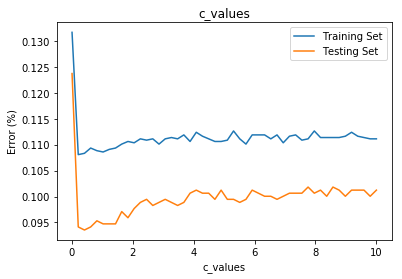

In [15]:
# range for cvgrid for c_values is 13-18 

plt.title('c_values')
plt.plot(train_df['c_value'],train_df['error rate'], label='Training Set')
plt.plot(test_df['c_value'],test_df['error rate'], label='Testing Set')
plt.xlabel('c_values')
plt.ylabel('Error (%)')
plt.legend()

### gridsearchcv

**L1 regression**

In [16]:
# define different algorithms to use in the optimization problem of L1 regression

solvers1 = ['saga', 'liblinear']

# define the norm used in the penalization as L1 regression

penalty1 = ['l1']

# define an array of C values (inverse of regularization strength)

c_values1 = np.linspace(0.01,1.5,50)

# initiate grid

grid1 = dict(solver=solvers1, penalty=penalty1, C=c_values1)
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [17]:
grid_search1 = GridSearchCV(estimator=LogisticRegression(), param_grid=grid1, n_jobs=-1, cv=cv1,error_score=0)

In [18]:
# fit the model with a combination of the parameters, this will take a while to run

grid_result1 = grid_search1.fit(train_x, train_y)

In [19]:
grid_result1.best_score_

0.8873417721518987

In [20]:
grid_result1.best_params_

{'C': 0.7093877551020409, 'penalty': 'l1', 'solver': 'liblinear'}

In [21]:
LR_model_best = LogisticRegression(penalty='l1', C=0.7093877551020409, random_state=0, solver='liblinear')

In [22]:
LR_model_best.fit(train_x,train_y)

LogisticRegression(C=0.7093877551020409, penalty='l1', random_state=0,
                   solver='liblinear')

In [23]:
pred_y_2_L1 = LR_model_best.predict(test_x)

In [24]:
pred_prob_y_2_L1 = LR_model_best.predict_proba(test_x)

In [25]:
# evaluate result

print("MAE:",mean_absolute_error(test_y, pred_y_2_L1))
print("Accuracy:",accuracy_score(test_y, pred_y_2_L1, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y_2_L1))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y_2_L1))

MAE: 0.09354647720544701
Accuracy: 0.9064535227945529
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1414
           1       0.83      0.53      0.65       275

    accuracy                           0.91      1689
   macro avg       0.87      0.76      0.80      1689
weighted avg       0.90      0.91      0.90      1689

Confusion Matrix: 
 [[1385   29]
 [ 129  146]]


**L2 regression**

In [26]:
# define different algorithms to use in the optimization problem of L1 regression

solvers2 = ['newton-cg', 'lbfgs', 'liblinear']

# define the norm used in the penalization as L1 regression

penalty2 = ['l2']

# define an array of C values (inverse of regularization strength)

c_values2 = np.linspace(0.01,1.5,50)

# initiate grid

grid2 = dict(solver=solvers2, penalty=penalty2, C=c_values2)
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [27]:
grid_search2 = GridSearchCV(estimator=LogisticRegression(), param_grid=grid2, n_jobs=-1, cv=cv2,error_score=0)

In [28]:
grid_result2 = grid_search2.fit(train_x, train_y)

In [29]:
grid_result2.best_score_

0.8886958384201846

In [30]:
grid_result2.best_params_

{'C': 0.07081632653061225, 'penalty': 'l2', 'solver': 'newton-cg'}

In [31]:
LR_model_best2 = LogisticRegression(penalty='l2', C=0.07081632653061225, random_state=0, solver='newton-cg')

In [32]:
LR_model_best2.fit(train_x,train_y)

LogisticRegression(C=0.07081632653061225, random_state=0, solver='newton-cg')

In [33]:
pred_y_2_L2 = LR_model_best2.predict(test_x)

In [34]:
pred_prob_y_2_L2 = LR_model_best2.predict_proba(test_x)

## Evaluation

In [35]:
# evaluate result

print("MAE:",mean_absolute_error(test_y, pred_y_2_L2))
print("Accuracy:",accuracy_score(test_y, pred_y_2_L2, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y_2_L2))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y_2_L2))

MAE: 0.09591474245115453
Accuracy: 0.9040852575488455
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1414
           1       0.86      0.49      0.63       275

    accuracy                           0.90      1689
   macro avg       0.88      0.74      0.79      1689
weighted avg       0.90      0.90      0.89      1689

Confusion Matrix: 
 [[1391   23]
 [ 139  136]]


### Precision-Recall Curve

In [36]:
# array the test_y

test_y_array = np.array(test_y)

In [37]:
# precision-recall curve

precision1, recall1, threshold1 = precision_recall_curve(test_y_array, pred_prob_y[:,1])
precision2_L1, recall2_L1, threshold2 = precision_recall_curve(test_y_array, pred_prob_y_2_L1[:,1])

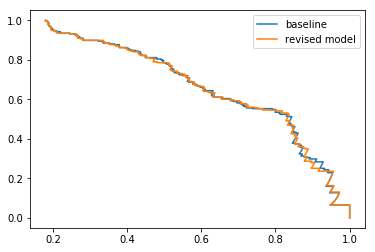

In [38]:
plt.plot(precision1,recall1, label='baseline') #baseline
plt.plot(precision2_L1,recall2_L1, label='revised model') #cvgrid new model
plt.legend()

In [39]:
precision1, recall1, threshold1 = precision_recall_curve(test_y_array, pred_prob_y[:,1])
precision2_L2, recall2_L2, threshold2_L2 = precision_recall_curve(test_y_array, pred_prob_y_2_L2[:,1])

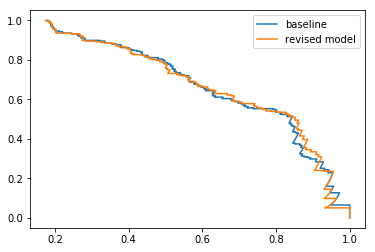

In [40]:
plt.plot(precision1,recall1, label='baseline') #baseline
plt.plot(precision2_L2,recall2_L2, label='revised model') #cvgrid new model
plt.legend()

### ROC / AUC Curve

In [41]:
pred_prob_y_2_L1[:,1]

array([0.75686397, 0.00245362, 0.17240455, ..., 0.80229652, 0.18683952,
       0.22277897])

In [42]:
# ROC

fpr1, tpr1, threshold3 = metrics.roc_curve(test_y_array, pred_prob_y[:,1])
fpr2_L1, tpr2_L1, threshold4_L1 = metrics.roc_curve(test_y_array, pred_prob_y_2_L1[:,1])

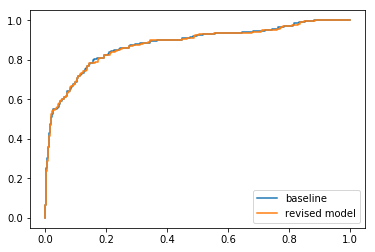

In [43]:
plt.plot(fpr1,tpr1, label='baseline') #baseline
plt.plot(fpr2_L1,tpr2_L1, label='revised model') #cvgrid new model
plt.legend()

In [44]:
# AUC - baseline

metrics.auc(fpr1, tpr1)

0.8795293815095795

In [45]:
# AUC - revised model

metrics.auc(fpr2_L1, tpr2_L1)

0.8783978397839785

In [46]:
# ROC

fpr1, tpr1, threshold3 = metrics.roc_curve(test_y_array, pred_prob_y[:,1])
fpr2_L2, tpr2_L2, threshold4_L2 = metrics.roc_curve(test_y_array, pred_prob_y_2_L2[:,1])

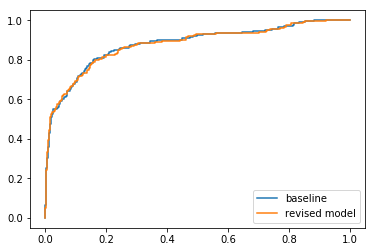

In [47]:
plt.plot(fpr1,tpr1, label='baseline') #baseline
plt.plot(fpr2_L2,tpr2_L2, label='revised model') #cvgrid new model
plt.legend()

In [48]:
# AUC - revised model

metrics.auc(fpr2_L2, tpr2_L2)

0.8778937893789379

### Cost Sensitivity Analysis - Logistic Regression using L1 as penalty

In [49]:
# Cost function used: Cost= FP x (1) + FN x (25)

In [50]:
# converting the fpr, tpr, threshold arrays obtained previously to lists for easier manipulation

fpr2_L1.tolist()
tpr2_L1.tolist()
threshold4_L1.tolist()

[1.9944758095092097,
 0.9944758095092097,
 0.9223877783347858,
 0.9168555906540431,
 0.9135555446153604,
 0.9128770250886289,
 0.855180211660985,
 0.8491920961105752,
 0.8373078681075456,
 0.8307563645413443,
 0.8281628563667415,
 0.8022965216232832,
 0.7972715501810254,
 0.754463312832364,
 0.7537386547071894,
 0.7535724733900877,
 0.7507158635516317,
 0.7222708541687453,
 0.7162666195960353,
 0.7101331490806955,
 0.7089281006000587,
 0.6975652605672027,
 0.6969416086875417,
 0.6827849884616501,
 0.6827224033535402,
 0.6741717592977764,
 0.6707439457094416,
 0.6685915433568633,
 0.6671788986582456,
 0.666780381586089,
 0.6648940605761732,
 0.6626461785068015,
 0.6610077436218101,
 0.6606879500421744,
 0.6600530832212094,
 0.6596521641203607,
 0.6510590878387728,
 0.6504758396908628,
 0.6428665330524975,
 0.6350713559753379,
 0.6294175122504357,
 0.604783201540641,
 0.6046333799887298,
 0.5999917603872221,
 0.5963683994656594,
 0.5960722762564644,
 0.5936642471181759,
 0.58340187290605

In [53]:
# calculate the cost for each thresholds and compile them into a list 

costlist2=[]
fnr2_L1=[]
for fpr,tpr,thres in zip(fpr2_L1[1:], tpr2_L1[1:], threshold4_L1[1:]):
    fnr=1-tpr
    fnr2_L1.append(fnr)
    cost=((fpr*(1414)*1)+(fnr*275*25))
    costlist2.append(cost)

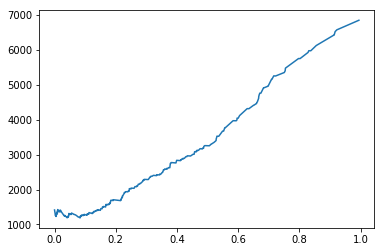

In [54]:
# plot the cost curve

plt.plot(threshold4_L1[1:],costlist2, label='baseline')

In [55]:
# find the minimum cost from the cost curve and its corresponding threshold

newlist=[]
for m, n in zip(threshold4_L1[1:],costlist2):
    newlist.append([m,n])
a,b=newlist[costlist2.index(min(costlist2))]
print("The best performing threshold is",a,"with a minimum cost of",b,".")

The best performing threshold is 0.08339311256468775 with a minimum cost of 1187.0 .


### Feature Importance Analysis -  Logistic Regression using L1 as penalty

Feature: 0, Score: 0.40023
Feature: 1, Score: 0.30843
Feature: 2, Score: 0.26821
Feature: 3, Score: 0.22107
Feature: 4, Score: 1.69339
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.14074
Feature: 7, Score: -1.62847
Feature: 8, Score: -0.08144
Feature: 9, Score: 0.30774
Feature: 10, Score: -0.35230
Feature: 11, Score: -0.02591
Feature: 12, Score: -0.57187
Feature: 13, Score: 0.46423
Feature: 14, Score: 0.00426
Feature: 15, Score: -0.19405
Feature: 16, Score: 0.28695
Feature: 17, Score: 1.00205
Feature: 18, Score: -0.30217
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.40251
Feature: 21, Score: 0.35376
Feature: 22, Score: -0.44019
Feature: 23, Score: 0.00000
Feature: 24, Score: -1.86439
Feature: 25, Score: -0.66654
Feature: 26, Score: -0.82892
Feature: 27, Score: -0.77704
Feature: 28, Score: -0.99871


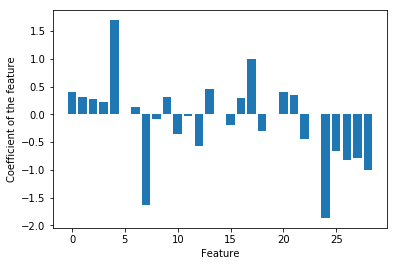

In [56]:
# get importance

importance = LR_model_best.coef_[0]

# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient of the feature')
plt.show()

In [57]:
# find the top three informative features

importancelist=importance.tolist()
for v in sorted(importancelist,key=abs,reverse=True)[:3]:
    print('Feature: %0d, Score: %.5f' % (importancelist.index(v),v))

Feature: 24, Score: -1.86439
Feature: 4, Score: 1.69339
Feature: 7, Score: -1.62847


In [58]:
# Feature 24, 4, 7 are the most informative features according to the decision tree text representation.

print('The most informative features are {}, {}, and {}'.format(train_x.columns[24], train_x.columns[4],train_x.columns[7]))

The most informative features are Laptop & Accessory, Complain, and Tenure_zscore
